### Discretization.

Discretization is the process of transferring continuous functions, models, variables, and equations into discrete counterparts.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import KBinsDiscretizer

from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer

In [13]:
#x = pd.read_csv('train.csv')
#x.dropna(inplace=True)
#x.shape

In [14]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [15]:
df.shape

(891, 3)

In [16]:
df.sample(6)

,Survived,Age,Fare
703,0,25.0,7.7417
542,0,11.0,31.2750
88,1,23.0,263.0000
682,0,20.0,9.2250
206,0,32.0,15.8500
344,0,36.0,13.0000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [18]:
"""
Drop all the rows where you find any value "NA" in any of the columns. 
"""
df.dropna(inplace = True)

In [19]:
df.shape

(714, 3)

In [21]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [22]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [24]:
clf = DecisionTreeClassifier()

In [26]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred)

0.6363636363636364

In [29]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv = 10,scoring='accuracy'))

0.6317292644757433

#### <b style = 'color:red'>Quantile Binning.</b>

Quantile binning is also known as <b style = 'color:orange'>Equal Frequency Binning.</b> It assigns the same number of observations to each bin, if the number of observations is evenly divisible by the number of bins. The <b style = 'color:green'>range</b> of every bin may vary due to the assignment of same no. observations in every bin.

In [50]:
kbin_age = KBinsDiscretizer(n_bins=10,strategy='quantile',encode='ordinal')
kbin_fare = KBinsDiscretizer(n_bins=10,strategy='quantile',encode='ordinal')

In [51]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [52]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [53]:
#X_train_trf

In [54]:
trf.named_transformers_['first'].n_bins_

array([10])

In [55]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

#### <b style = 'color:red'>Uniform Binning</b>
 
Uniform Binning is also known as <b style = 'color:orange'>Equal Width Binning.</b> It divides the value range of a column into a specific number of <b style = 'color:green'>bins/intervals.</b>

In [56]:
kbin_age = KBinsDiscretizer(n_bins=10,strategy='uniform',encode='ordinal')
kbin_fare = KBinsDiscretizer(n_bins=10,strategy='uniform',encode='ordinal')

In [57]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [58]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [62]:
trf.named_transformers_['second'].n_bins_

array([10])

In [61]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
              307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ])          ],
      dtype=object)

#### <b style = 'color:red'>K-means Binning </b>
A K-means discretization transform will attempt to <b style = 'color:orange'>fit k clusters for each input data</b> and then assign each observation to a <b style = 'color:green'>cluster.</b>

In [70]:
kbin_age = KBinsDiscretizer(n_bins=10,strategy='kmeans',encode='ordinal')
kbin_fare = KBinsDiscretizer(n_bins=10,strategy='kmeans',encode='ordinal')

In [71]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [72]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [73]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.        ,  11.69418654,  22.36748198,  42.19216656,
               67.87308285, 100.48995908, 137.40500686, 185.67419167,
              237.86718333, 385.651575  , 512.3292    ])             ],
      dtype=object)

In [ ]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [75]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [76]:
output.head(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
328,31.0,3.0,20.5250,1.0,"(24.835, 32.42]","(11.694, 22.367]"
73,26.0,3.0,14.4542,1.0,"(24.835, 32.42]","(11.694, 22.367]"
253,30.0,3.0,16.1000,1.0,"(24.835, 32.42]","(11.694, 22.367]"
719,33.0,4.0,7.7750,0.0,"(32.42, 40.345]","(0.0, 11.694]"
666,25.0,3.0,13.0000,1.0,"(24.835, 32.42]","(11.694, 22.367]"


In [77]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [78]:
accuracy_score(y_test,y_pred2)

0.6083916083916084

In [79]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6275039123630672

In [80]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6345070422535211


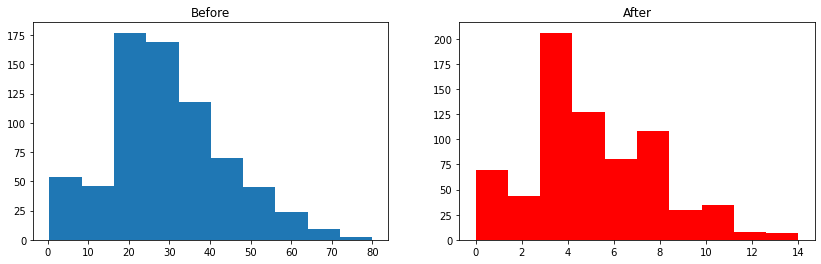

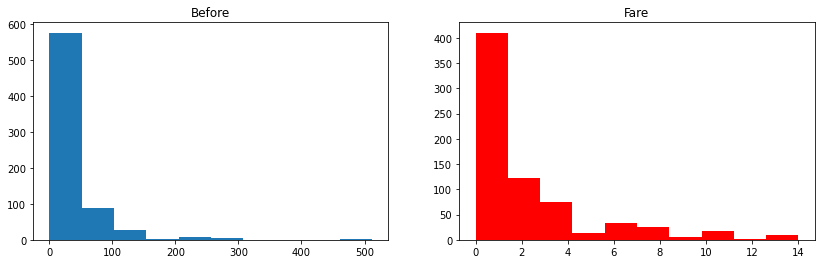

In [86]:
discretize(15,'kmeans')